In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU, ELU, ReLU, GaussianNoise
from keras.optimizers import SGD, Adam
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard
from keras.losses import MeanSquaredError

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 10, 8

## Exploring dataset a bit

Load the dataset

In [3]:
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

```
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's
```

In [4]:
X = boston.data
Y = boston.target
print(X.shape, Y.shape)

(506, 13) (506,)


Histogram of target values

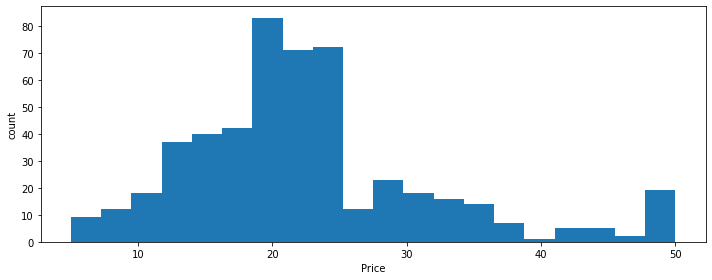

In [5]:
rcParams['figure.figsize'] = 10, 4
plt.hist(Y, bins = 20)
plt.xlabel('Price')
plt.ylabel('count')
plt.tight_layout()

First two Principal Components plot

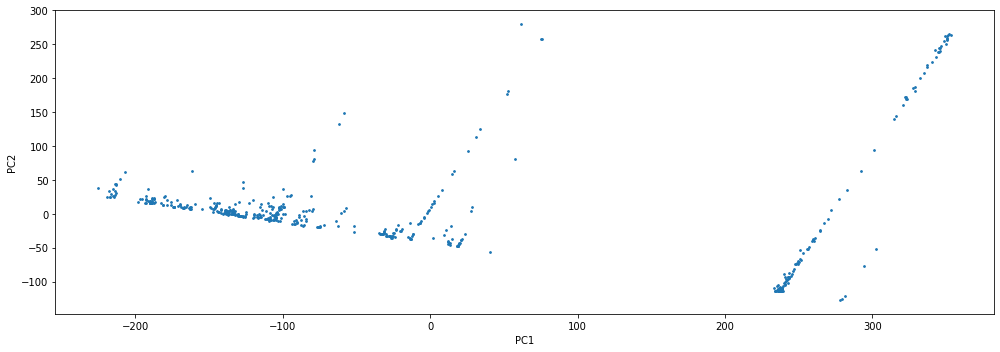

In [6]:
plt.figure(figsize=(14, 5))
pc_data = PCA().fit_transform(X)
plt.scatter(pc_data[:,0], pc_data[:,1], s = 3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

First Principal Component and target

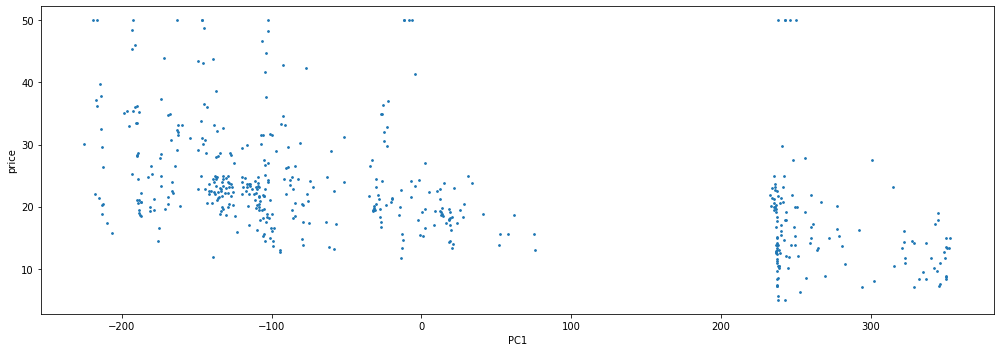

In [7]:
plt.figure(figsize=(14, 5))
pc_data = PCA().fit_transform(X)
plt.scatter(pc_data[:,0], Y, s = 3)
plt.xlabel('PC1')
plt.ylabel('price')
plt.tight_layout()
plt.show()

## Scaling and Train, Test, Valid split

In [8]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Y = Y[:,np.newaxis]
scaler.mean_

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

In [9]:
x_train, x_test,  y_train, y_test  = train_test_split(Xs, Y, test_size = 0.5)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.5)
print(f'Train = {x_train.shape}, {y_train.shape}')
print(f'Valid = {x_valid.shape}, {y_valid.shape}')
print(f'Test  = {x_test.shape}, {y_test.shape}')

Train = (126, 13), (126, 1)
Valid = (127, 13), (127, 1)
Test  = (253, 13), (253, 1)


## Simple Neural Network

In [10]:
model = Sequential(name="Regressor NN")

model.add(Dense(10, input_dim = X.shape[1], name = 'dense1'))
model.add(ReLU())
model.add(Dense(Y.shape[1], name = 'output'))
model.add(ReLU())

model.summary()

Model: "Regressor NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 10)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 11        
_________________________________________________________________
re_lu_2 (ReLU)               (None, 1)                 0         
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss = MeanSquaredError(), optimizer = SGD(), metrics = ['mae'])

In [14]:
log = model.fit(x_train, y_train,
    batch_size = 32,
    epochs = 50,
    verbose = 2,
    validation_data=(x_valid, y_valid)
)

Train on 126 samples, validate on 127 samples
Epoch 1/50
 - 1s - loss: 510.6286 - mae: 20.6483 - val_loss: 263.6485 - val_mae: 13.9167
Epoch 2/50
 - 0s - loss: 138.7823 - mae: 9.1901 - val_loss: 48.5529 - val_mae: 4.8766
Epoch 3/50
 - 0s - loss: 26.5238 - mae: 3.8096 - val_loss: 29.5514 - val_mae: 3.6502
Epoch 4/50
 - 0s - loss: 17.1405 - mae: 3.2829 - val_loss: 25.0737 - val_mae: 3.3484
Epoch 5/50
 - 0s - loss: 13.0756 - mae: 2.9104 - val_loss: 24.6766 - val_mae: 3.3651
Epoch 6/50
 - 0s - loss: 11.9178 - mae: 2.8464 - val_loss: 22.9536 - val_mae: 3.2625
Epoch 7/50
 - 0s - loss: 11.4796 - mae: 2.7974 - val_loss: 22.9325 - val_mae: 3.3393
Epoch 8/50
 - 0s - loss: 14.1352 - mae: 3.1255 - val_loss: 22.5427 - val_mae: 3.1626
Epoch 9/50
 - 0s - loss: 11.0615 - mae: 2.7045 - val_loss: 23.1687 - val_mae: 3.2742
Epoch 10/50
 - 0s - loss: 10.0925 - mae: 2.6582 - val_loss: 21.6792 - val_mae: 3.0660
Epoch 11/50
 - 0s - loss: 9.6427 - mae: 2.5600 - val_loss: 21.7413 - val_mae: 3.0945
Epoch 12/50
 

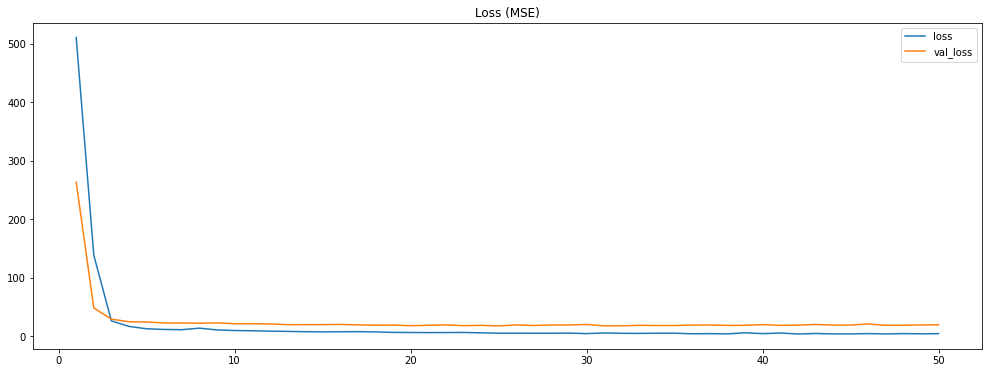

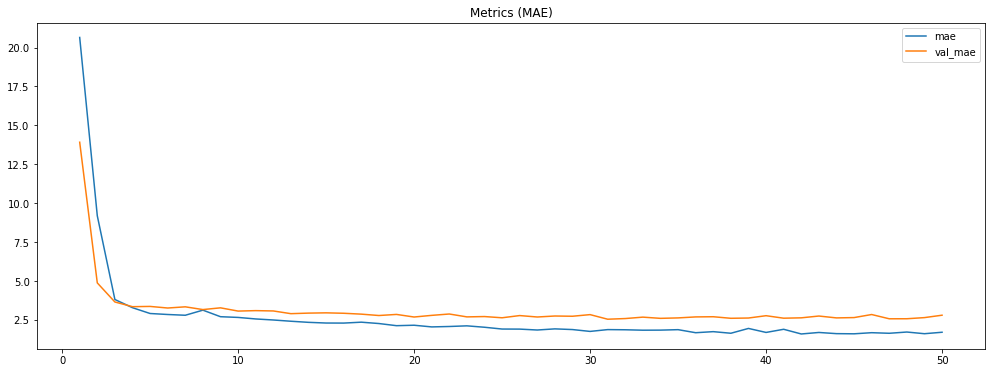

In [15]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.title('Loss (MSE)')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['mae'], label = 'mae')
plt.plot(xepochs, log.history['val_mae'], label = 'val_mae')
plt.title('Metrics (MAE)')
plt.legend()
plt.show()

In [16]:
print(f'MAE:\t\
{mean_absolute_error(model.predict(x_train), y_train):3.2f}\t\
{mean_absolute_error(model.predict(x_valid), y_valid):.2f}\t\
{mean_absolute_error(model.predict(x_test), y_test):.2f}')

print(f'MSE:\t\
{mean_squared_error(model.predict(x_train), y_train):3.2f}\t\
{mean_squared_error(model.predict(x_valid), y_valid):.2f}\t\
{mean_squared_error(model.predict(x_test), y_test):.2f}')

print(f'R2:\t\
{r2_score(model.predict(x_train), y_train):3.2f}\t\
{r2_score(model.predict(x_valid), y_valid):.2f}\t\
{r2_score(model.predict(x_test), y_test):.2f}')

MAE:	2.01	2.80	3.06
MSE:	6.61	19.85	20.30
R2:	0.87	0.69	0.72


## Increase complexity

In [12]:
model = Sequential(name="Regressor NN")

model.add(Dense(10, input_dim = X.shape[1], name = 'dense1'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(20, name = 'dense2'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(Y.shape[1], name = 'output'))
model.add(ReLU())

model.summary()

Model: "Regressor NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
gaussian_noise_3 (GaussianNo (None, 10)                0         
_________________________________________________________________
dense2 (Dense)               (None, 20)                220       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)               

In [18]:
model.compile(loss = MeanSquaredError(), optimizer = SGD(), metrics = ['mae'])

In [19]:
log = model.fit(x_train, y_train,
    batch_size = 127,
    epochs = 500,
    verbose = 2,
    validation_data=(x_valid, y_valid)
)

Train on 126 samples, validate on 127 samples
Epoch 1/500
 - 0s - loss: 569.6992 - mae: 22.3768 - val_loss: 508.2385 - val_mae: 21.0004
Epoch 2/500
 - 0s - loss: 556.2489 - mae: 22.0927 - val_loss: 485.2315 - val_mae: 20.5354
Epoch 3/500
 - 0s - loss: 533.6647 - mae: 21.6154 - val_loss: 445.9767 - val_mae: 19.7070
Epoch 4/500
 - 0s - loss: 489.3221 - mae: 20.7101 - val_loss: 369.5872 - val_mae: 17.9393
Epoch 5/500
 - 0s - loss: 401.2720 - mae: 18.5010 - val_loss: 225.2397 - val_mae: 13.3237
Epoch 6/500
 - 0s - loss: 347.1674 - mae: 16.5083 - val_loss: 328.7322 - val_mae: 16.5035
Epoch 7/500
 - 0s - loss: 369.4279 - mae: 17.0912 - val_loss: 216.6828 - val_mae: 12.8908
Epoch 8/500
 - 0s - loss: 220.4967 - mae: 13.2243 - val_loss: 123.0019 - val_mae: 8.5291
Epoch 9/500
 - 0s - loss: 308.6367 - mae: 14.1444 - val_loss: 281.1176 - val_mae: 14.3933
Epoch 10/500
 - 0s - loss: 331.1060 - mae: 15.7366 - val_loss: 193.9917 - val_mae: 11.6740
Epoch 11/500
 - 0s - loss: 225.0744 - mae: 12.6341 - v

 - 0s - loss: 66.3485 - mae: 5.8471 - val_loss: 22.3990 - val_mae: 2.9545
Epoch 95/500
 - 0s - loss: 44.0794 - mae: 5.0499 - val_loss: 21.8584 - val_mae: 2.8954
Epoch 96/500
 - 0s - loss: 71.6207 - mae: 5.8558 - val_loss: 31.4258 - val_mae: 3.8176
Epoch 97/500
 - 0s - loss: 56.8782 - mae: 5.4907 - val_loss: 22.3407 - val_mae: 2.8863
Epoch 98/500
 - 0s - loss: 45.1308 - mae: 4.9994 - val_loss: 22.5947 - val_mae: 2.9981
Epoch 99/500
 - 0s - loss: 52.3388 - mae: 5.4568 - val_loss: 24.4156 - val_mae: 3.0986
Epoch 100/500
 - 0s - loss: 42.4325 - mae: 4.8298 - val_loss: 30.4780 - val_mae: 3.7102
Epoch 101/500
 - 0s - loss: 56.9445 - mae: 5.4273 - val_loss: 21.2436 - val_mae: 2.8203
Epoch 102/500
 - 0s - loss: 50.6330 - mae: 5.3004 - val_loss: 27.2273 - val_mae: 3.4391
Epoch 103/500
 - 0s - loss: 46.6037 - mae: 4.9495 - val_loss: 31.4088 - val_mae: 3.7730
Epoch 104/500
 - 0s - loss: 50.4850 - mae: 5.0001 - val_loss: 22.6055 - val_mae: 2.9467
Epoch 105/500
 - 0s - loss: 46.2395 - mae: 4.9561 -

Epoch 188/500
 - 0s - loss: 40.8240 - mae: 4.8917 - val_loss: 21.7999 - val_mae: 2.8581
Epoch 189/500
 - 0s - loss: 39.0385 - mae: 4.5833 - val_loss: 22.6941 - val_mae: 3.0236
Epoch 190/500
 - 0s - loss: 39.4311 - mae: 4.6904 - val_loss: 23.3559 - val_mae: 3.1639
Epoch 191/500
 - 0s - loss: 38.8296 - mae: 4.7286 - val_loss: 22.8601 - val_mae: 3.0601
Epoch 192/500
 - 0s - loss: 31.1570 - mae: 4.1680 - val_loss: 23.7177 - val_mae: 3.1397
Epoch 193/500
 - 0s - loss: 40.1417 - mae: 4.5382 - val_loss: 20.3999 - val_mae: 2.7547
Epoch 194/500
 - 0s - loss: 26.2885 - mae: 4.0583 - val_loss: 21.5300 - val_mae: 2.8689
Epoch 195/500
 - 0s - loss: 31.6803 - mae: 4.2533 - val_loss: 21.0437 - val_mae: 2.7418
Epoch 196/500
 - 0s - loss: 36.6909 - mae: 4.1959 - val_loss: 21.1339 - val_mae: 2.7397
Epoch 197/500
 - 0s - loss: 39.2415 - mae: 4.4651 - val_loss: 24.6094 - val_mae: 3.1894
Epoch 198/500
 - 0s - loss: 31.8058 - mae: 4.1558 - val_loss: 24.1852 - val_mae: 3.0808
Epoch 199/500
 - 0s - loss: 39.9

 - 0s - loss: 29.2295 - mae: 4.0759 - val_loss: 21.3603 - val_mae: 2.7015
Epoch 282/500
 - 0s - loss: 24.0691 - mae: 3.4722 - val_loss: 21.3891 - val_mae: 2.7271
Epoch 283/500
 - 0s - loss: 28.0700 - mae: 3.8409 - val_loss: 22.1212 - val_mae: 2.9260
Epoch 284/500
 - 0s - loss: 34.8076 - mae: 3.9951 - val_loss: 21.3305 - val_mae: 2.8161
Epoch 285/500
 - 0s - loss: 33.4856 - mae: 4.1411 - val_loss: 21.7855 - val_mae: 2.8519
Epoch 286/500
 - 0s - loss: 30.6576 - mae: 3.9579 - val_loss: 21.2070 - val_mae: 2.7984
Epoch 287/500
 - 0s - loss: 51.4889 - mae: 5.0512 - val_loss: 20.9674 - val_mae: 2.8557
Epoch 288/500
 - 0s - loss: 31.9941 - mae: 4.1169 - val_loss: 20.7028 - val_mae: 2.8186
Epoch 289/500
 - 0s - loss: 33.7936 - mae: 4.4992 - val_loss: 24.0793 - val_mae: 3.2656
Epoch 290/500
 - 0s - loss: 33.5934 - mae: 4.0408 - val_loss: 19.8459 - val_mae: 2.6852
Epoch 291/500
 - 0s - loss: 29.2100 - mae: 4.1560 - val_loss: 21.5073 - val_mae: 2.8801
Epoch 292/500
 - 0s - loss: 26.9988 - mae: 4.0

Epoch 375/500
 - 0s - loss: 24.5772 - mae: 3.5298 - val_loss: 20.0497 - val_mae: 2.7675
Epoch 376/500
 - 0s - loss: 19.6734 - mae: 3.5646 - val_loss: 20.1062 - val_mae: 2.7197
Epoch 377/500
 - 0s - loss: 31.9185 - mae: 4.0920 - val_loss: 20.5557 - val_mae: 2.7263
Epoch 378/500
 - 0s - loss: 24.5399 - mae: 3.6235 - val_loss: 21.2670 - val_mae: 2.8311
Epoch 379/500
 - 0s - loss: 22.9294 - mae: 3.6097 - val_loss: 19.8988 - val_mae: 2.7008
Epoch 380/500
 - 0s - loss: 27.5126 - mae: 3.6870 - val_loss: 20.0733 - val_mae: 2.7591
Epoch 381/500
 - 0s - loss: 28.6837 - mae: 3.8790 - val_loss: 20.4297 - val_mae: 2.7455
Epoch 382/500
 - 0s - loss: 29.6379 - mae: 4.1663 - val_loss: 18.8397 - val_mae: 2.6171
Epoch 383/500
 - 0s - loss: 30.5898 - mae: 3.7569 - val_loss: 21.0656 - val_mae: 2.9373
Epoch 384/500
 - 0s - loss: 25.4907 - mae: 3.4993 - val_loss: 19.9741 - val_mae: 2.7736
Epoch 385/500
 - 0s - loss: 28.8212 - mae: 3.7903 - val_loss: 19.8949 - val_mae: 2.7205
Epoch 386/500
 - 0s - loss: 36.5

 - 0s - loss: 32.4073 - mae: 4.2149 - val_loss: 20.7497 - val_mae: 2.7667
Epoch 469/500
 - 0s - loss: 28.6240 - mae: 3.9321 - val_loss: 20.9621 - val_mae: 2.7050
Epoch 470/500
 - 0s - loss: 21.4094 - mae: 3.3979 - val_loss: 20.2849 - val_mae: 2.7146
Epoch 471/500
 - 0s - loss: 28.7110 - mae: 3.7711 - val_loss: 20.1217 - val_mae: 2.6600
Epoch 472/500
 - 0s - loss: 25.4571 - mae: 3.4830 - val_loss: 20.8846 - val_mae: 2.7221
Epoch 473/500
 - 0s - loss: 25.8412 - mae: 3.7000 - val_loss: 19.8096 - val_mae: 2.7147
Epoch 474/500
 - 0s - loss: 26.3302 - mae: 3.7076 - val_loss: 20.4417 - val_mae: 2.7162
Epoch 475/500
 - 0s - loss: 27.0888 - mae: 3.7257 - val_loss: 20.0889 - val_mae: 2.6679
Epoch 476/500
 - 0s - loss: 28.5411 - mae: 3.8874 - val_loss: 20.1796 - val_mae: 2.7189
Epoch 477/500
 - 0s - loss: 30.2822 - mae: 3.9554 - val_loss: 20.5399 - val_mae: 2.7571
Epoch 478/500
 - 0s - loss: 25.7290 - mae: 3.5189 - val_loss: 21.0042 - val_mae: 2.7715
Epoch 479/500
 - 0s - loss: 24.0112 - mae: 3.7

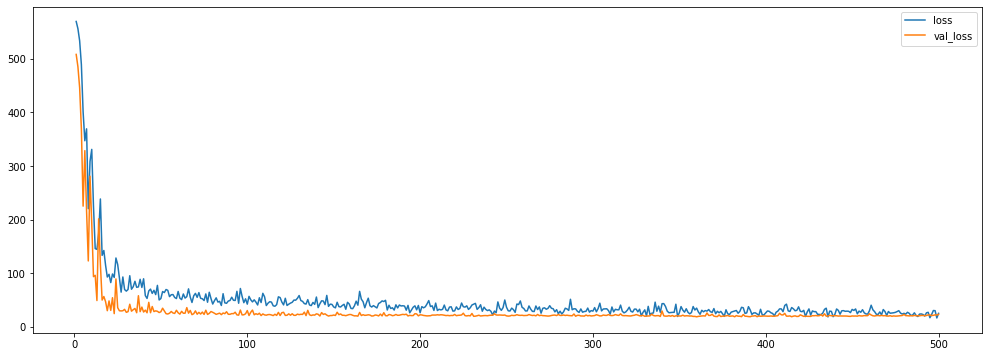

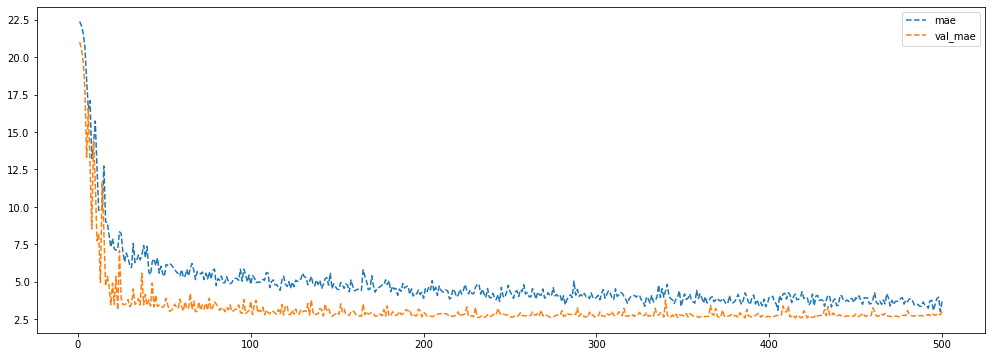

In [20]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['mae'], '--', label = 'mae')
plt.plot(xepochs, log.history['val_mae'], '--', label = 'val_mae')
plt.legend()
plt.show()

In [21]:
print(f'MAE:\t\
{mean_absolute_error(model.predict(x_train), y_train):3.2f}\t\
{mean_absolute_error(model.predict(x_valid), y_valid):.2f}\t\
{mean_absolute_error(model.predict(x_test), y_test):.2f}')

print(f'MSE:\t\
{mean_squared_error(model.predict(x_train), y_train):3.2f}\t\
{mean_squared_error(model.predict(x_valid), y_valid):.2f}\t\
{mean_squared_error(model.predict(x_test), y_test):.2f}')

print(f'R2:\t\
{r2_score(model.predict(x_train), y_train):3.2f}\t\
{r2_score(model.predict(x_valid), y_valid):.2f}\t\
{r2_score(model.predict(x_test), y_test):.2f}')

MAE:	2.78	3.03	3.60
MSE:	15.12	23.31	31.09
R2:	0.46	0.42	0.27


## Early stop

In [22]:
model = Sequential(name="Regressor NN")

model.add(Dense(10, input_dim = X.shape[1], name = 'dense1'))
model.add(ELU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(10, name = 'dense2'))
model.add(ELU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(Y.shape[1], name = 'output'))
model.add(ReLU())

model.summary()

Model: "Regressor NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
elu_1 (ELU)                  (None, 10)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
gaussian_noise_3 (GaussianNo (None, 10)                0         
_________________________________________________________________
dense2 (Dense)               (None, 10)                110       
_________________________________________________________________
elu_2 (ELU)                  (None, 10)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)               

In [24]:
model.compile(loss = MeanSquaredError(), optimizer = SGD(), metrics = ['mae'])
es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 20, verbose = 1, restore_best_weights = True)

In [25]:
log = model.fit(x_train, y_train,
    batch_size = 127,
    epochs = 500,
    verbose = 2,
    validation_data=(x_valid, y_valid),
    callbacks = [ es ]
)

Train on 126 samples, validate on 127 samples
Epoch 1/500
 - 0s - loss: 543.9931 - mae: 21.8016 - val_loss: 437.9560 - val_mae: 19.4736
Epoch 2/500
 - 0s - loss: 487.5100 - mae: 20.4970 - val_loss: 312.3588 - val_mae: 16.1205
Epoch 3/500
 - 0s - loss: 366.3498 - mae: 17.2172 - val_loss: 185.9942 - val_mae: 10.7944
Epoch 4/500
 - 0s - loss: 406.0481 - mae: 16.8967 - val_loss: 364.4753 - val_mae: 17.7048
Epoch 5/500
 - 0s - loss: 414.0861 - mae: 18.7140 - val_loss: 256.7378 - val_mae: 14.4996
Epoch 6/500
 - 0s - loss: 289.4657 - mae: 15.1255 - val_loss: 140.9783 - val_mae: 9.1309
Epoch 7/500
 - 0s - loss: 238.2543 - mae: 13.3918 - val_loss: 158.9627 - val_mae: 10.9770
Epoch 8/500
 - 0s - loss: 224.3727 - mae: 12.5535 - val_loss: 74.9318 - val_mae: 6.1893
Epoch 9/500
 - 0s - loss: 146.3737 - mae: 9.8523 - val_loss: 73.3841 - val_mae: 6.3705
Epoch 10/500
 - 0s - loss: 94.4460 - mae: 7.5432 - val_loss: 50.2929 - val_mae: 4.9036
Epoch 11/500
 - 0s - loss: 119.0732 - mae: 8.3745 - val_loss: 4

Epoch 95/500
 - 0s - loss: 70.3563 - mae: 5.9229 - val_loss: 20.6215 - val_mae: 2.7629
Epoch 96/500
 - 0s - loss: 48.1439 - mae: 5.4283 - val_loss: 22.2336 - val_mae: 2.9040
Epoch 97/500
 - 0s - loss: 60.7277 - mae: 5.8535 - val_loss: 20.3882 - val_mae: 2.8234
Epoch 98/500
 - 0s - loss: 67.9713 - mae: 6.3413 - val_loss: 26.7819 - val_mae: 3.3726
Epoch 99/500
 - 0s - loss: 57.3173 - mae: 5.4297 - val_loss: 22.3408 - val_mae: 2.9548
Epoch 100/500
 - 0s - loss: 55.9279 - mae: 5.3819 - val_loss: 20.5541 - val_mae: 2.7567
Epoch 101/500
 - 0s - loss: 61.2058 - mae: 5.9546 - val_loss: 29.1237 - val_mae: 3.5074
Epoch 102/500
 - 0s - loss: 57.6873 - mae: 5.5646 - val_loss: 20.6733 - val_mae: 2.7693
Epoch 103/500
 - 0s - loss: 60.8078 - mae: 5.6262 - val_loss: 22.8980 - val_mae: 3.0494
Epoch 104/500
 - 0s - loss: 38.7234 - mae: 4.8178 - val_loss: 21.5110 - val_mae: 2.9254
Epoch 105/500
 - 0s - loss: 42.1675 - mae: 5.0333 - val_loss: 22.7420 - val_mae: 3.0012
Epoch 106/500
 - 0s - loss: 41.8063 -

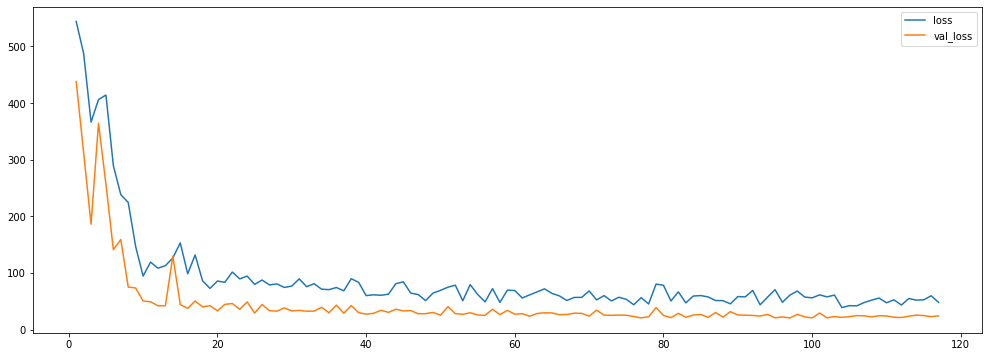

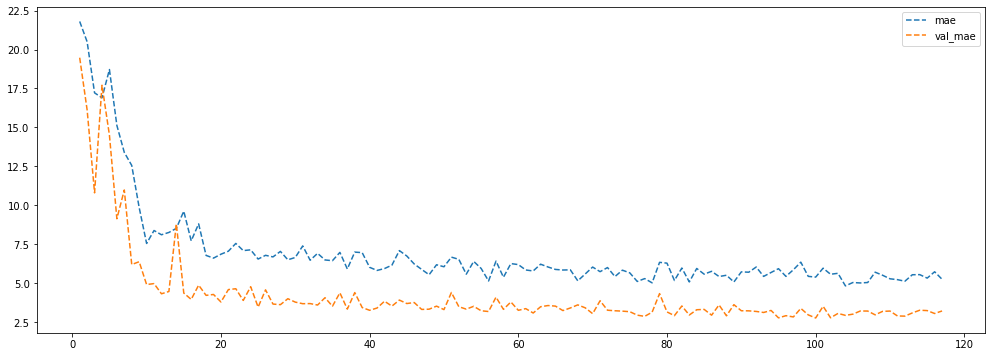

In [26]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['mae'], '--', label = 'mae')
plt.plot(xepochs, log.history['val_mae'], '--', label = 'val_mae')
plt.legend()
plt.show()

In [27]:
print(f'MAE:\t\
{mean_absolute_error(model.predict(x_train), y_train):3.2f}\t\
{mean_absolute_error(model.predict(x_valid), y_valid):.2f}\t\
{mean_absolute_error(model.predict(x_test), y_test):.2f}')

print(f'MSE:\t\
{mean_squared_error(model.predict(x_train), y_train):3.2f}\t\
{mean_squared_error(model.predict(x_valid), y_valid):.2f}\t\
{mean_squared_error(model.predict(x_test), y_test):.2f}')

print(f'R2:\t\
{r2_score(model.predict(x_train), y_train):3.2f}\t\
{r2_score(model.predict(x_valid), y_valid):.2f}\t\
{r2_score(model.predict(x_test), y_test):.2f}')

MAE:	2.45	2.82	3.34
MSE:	11.94	20.39	28.29
R2:	0.78	0.64	0.55
